# Evaluatiemetrieken

## Zelfgeschreven functies
* accuracy
* precision
* recall
* f_measure
* plot_roc

In [115]:
import pandas as pd


def accuracy(confusion_matrix: pd.DataFrame):
    return pd.DataFrame([np.sum(np.diag(confusion_matrix)) / confusion_matrix.to_numpy().sum()], index=['Total'],
                        columns=['Accuracy'])


def precision(confusion_matrix: pd.DataFrame, weighted=False):
    precisions = pd.DataFrame(np.diag(confusion_matrix) / confusion_matrix.sum(axis='rows'), columns=['Precision'])
    if weighted:
        weights = confusion_matrix.sum(axis='columns')  # weights of true labels
        return pd.DataFrame([np.average(precisions, weights=weights, axis=0)],
                            columns=precisions.columns, index=['Average Precision'])
    return pd.DataFrame(precisions)


def recall(confusion_matrix: pd.DataFrame, weighted=False):
    recalls = pd.DataFrame(np.diag(confusion_matrix) / confusion_matrix.sum(axis='columns'), columns=['Recall'])
    if weighted:
        weights = confusion_matrix.sum(axis='columns')  # weights of true labels
        return pd.DataFrame([np.average(recalls, weights=weights, axis=0)],
                            columns=recalls.columns, index=['Average Recall'])
    return pd.DataFrame(recalls)


def f_measure(confusion_matrix: pd.DataFrame, beta=1, weighted=False):
    precisions = precision(confusion_matrix, weighted=False)
    recalls = recall(confusion_matrix, weighted=False)
    fs = pd.DataFrame(list(map(fvalue, precisions.values, recalls.values, np.full(len(precisions), beta))),
                      index=precisions.index, columns=['F{}'.format(beta)])
    if weighted:
        weights = confusion_matrix.sum(axis='rows')
        return pd.DataFrame([np.average(fs, weights=weights, axis=0)], columns=fs.columns, index=['Average'])

    return fs


def fvalue(p, r, beta):
    return ((beta ** 2 + 1) * p * r) / (beta ** 2 * p + r)


def plot_roc(y_true, y_score, title='ROC Curve', **kwargs):
    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true == kwargs.get('pos_label'), y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    # plot ROC curve
    ax.plot(fpr, tpr, color='darkorange', label='AUC: {:.3f}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    # plot random classifier
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    # plot optimal threshold
    ax.scatter(fpr[optimal_idx], tpr[optimal_idx],
               label='optimal threshold {:.3f} op ({:.3f},{:.3f})'.format(optimal_threshold, fpr[optimal_idx],
                                                                          tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')

    ax.legend(loc='lower right')
    plt.show()

# Slidevoorbeeld

We simuleren het voorbeeld uit de slides.

In [116]:
import pandas as pd

cm = pd.DataFrame([[40, 20], [10, 30]], index=['positief', 'niet-positief'], columns=['positief', 'niet-positief'])
cm
# print(precision(cm))

positief  niet-positief
positief             40             20
niet-positief        10             30

We kunnen dit ook met de sklearn functies doen.

In [117]:
# ter illustratie
from sklearn.metrics import ConfusionMatrixDisplay

data = list(zip(['positief'] * 40, ['positief'] * 40, [0.8] * 40))
data.extend(list(zip(['niet-positief'] * 10, ['positief'] * 10, [0.2] * 10)))
data.extend(list(zip(['positief'] * 20, ['niet-positief'] * 20, [0.8] * 20)))
data.extend(list(zip(['niet-positief'] * 30, ['niet-positief'] * 30, [0.2] * 30)))
data = pd.DataFrame(data, columns=['y_true', 'y_pred', 'y_score'])

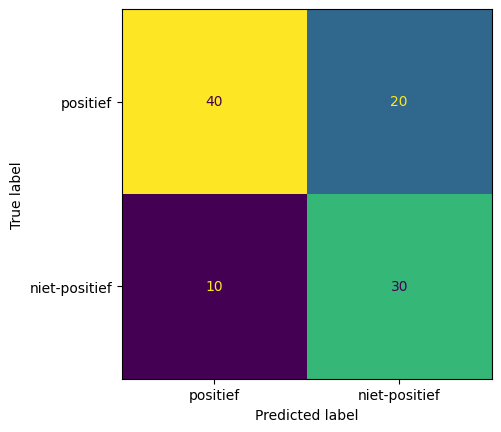

In [118]:
ax = ConfusionMatrixDisplay.from_predictions(data.y_true, data.y_pred,
                                             labels=['positief', 'niet-positief'],
                                             colorbar=False)

In [119]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# deze functies werken alleen met data, maar niet met een confusion matrix
# enkele voorbeelden van gebruik
confusion_matrix(data.y_true, data.y_pred, labels=['positief', 'niet-positief'])
precision_score(data.y_true, data.y_pred, pos_label='positief')
precision_score(data.y_true, data.y_pred, average='weighted')
recall_score(data.y_true, data.y_pred, pos_label='positief')
recall_score(data.y_true, data.y_pred, average='weighted')
f1_score(data.y_true, data.y_pred, average='weighted')

array([[40, 20],
       [10, 30]], dtype=int64)

0.8

0.72

0.6666666666666666

0.7

0.703030303030303

In [120]:
from IPython.core.display import Markdown
from IPython.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

HTML("<h3>Accuracy</h3>")
accuracy(cm)
HTML("<h3>Average Precision</h3>")
precision(cm, True) 
HTML("<h3>Precisions</h3>") 
precision(cm)
HTML("<h3>Average Recall</h3>")
recall(cm, True)
HTML("<h3>Recalls</h3>")
recall(cm)

HTML("<h3>Average F-measure</h3>")
f_measure(cm, weighted=True)
HTML("<h3>F-measures</h3>")
f_measure(cm, beta=1)

Accuracy
Total       0.7

Precision
Average Precision       0.72

Precision
positief             0.8
niet-positief        0.6

Recall
Average Recall     0.7

Recall
positief       0.666667
niet-positief  0.750000

F1
Average  0.69697

F1
positief       0.727273
niet-positief  0.666667

In [121]:
from sklearn.metrics import classification_report
# werkt met data, maar niet met een confusion matrix
print(classification_report(data.y_true, data.y_pred))
pd.DataFrame(classification_report(data.y_true, data.y_pred, output_dict=True)).T

               precision    recall  f1-score   support

niet-positief       0.60      0.75      0.67        40
     positief       0.80      0.67      0.73        60

     accuracy                           0.70       100
    macro avg       0.70      0.71      0.70       100
 weighted avg       0.72      0.70      0.70       100


precision    recall  f1-score  support
niet-positief       0.60  0.750000  0.666667     40.0
positief            0.80  0.666667  0.727273     60.0
accuracy            0.70  0.700000  0.700000      0.7
macro avg           0.70  0.708333  0.696970    100.0
weighted avg        0.72  0.700000  0.703030    100.0

# Factcheckers

In het programma Factcheckers werd een app onderzocht die beweert huidkanker te kunnen identificeren. Dermatologen verifiëerden de resultaten en ze kwamen tot de volgende conclusies:



<img src="https://i.imgur.com/K0BzWvJ.jpg" width="70%"/>

Een rode kaart betekent dat de app huidkanker voorspelt, een groene niet. De labels juist en fout zijn gegeven door de dermatologen.

              precision    recall  f1-score   support

           G       1.00      0.43      0.60         7
           K       0.43      1.00      0.60         3

    accuracy                           0.60        10
   macro avg       0.71      0.71      0.60        10
weighted avg       0.83      0.60      0.60        10


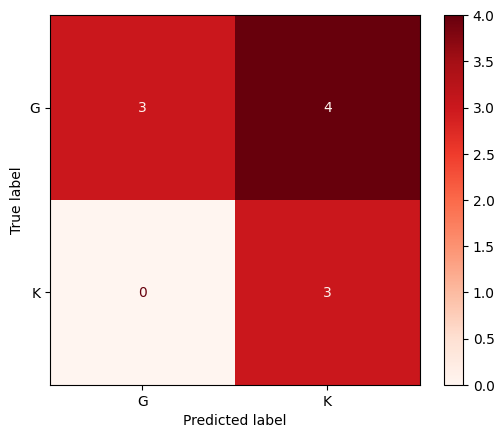

In [122]:
y_true = ['K', 'G', 'G', 'K', 'G', 'G', 'G', 'G', 'K', 'G']
y_pred = ['K', 'G', 'K', 'K', 'G', 'G', 'K', 'K', 'K', 'K']
y_score = [1, 0, 1, 1, 0, 0, 1, 1, 1, 1]

# cm = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=['G', 'K']), columns=['G', 'K'], index=['G', 'K'])
# cm
print(classification_report(y_true, y_pred))
ax = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='Reds')

# Biopsy

LinearDiscriminantAnalysis()

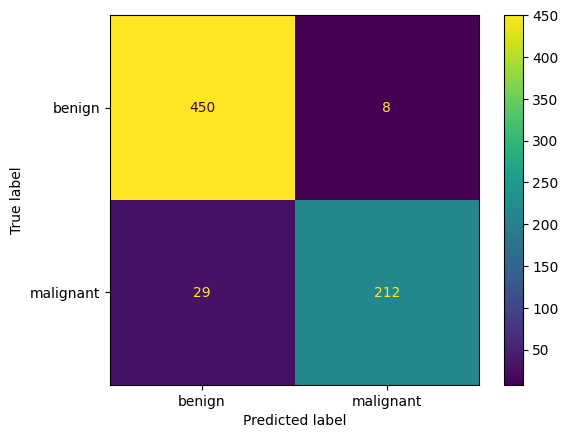

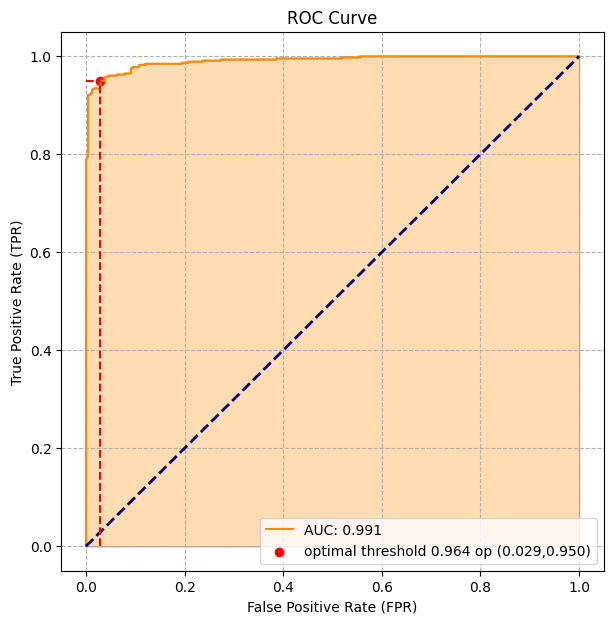

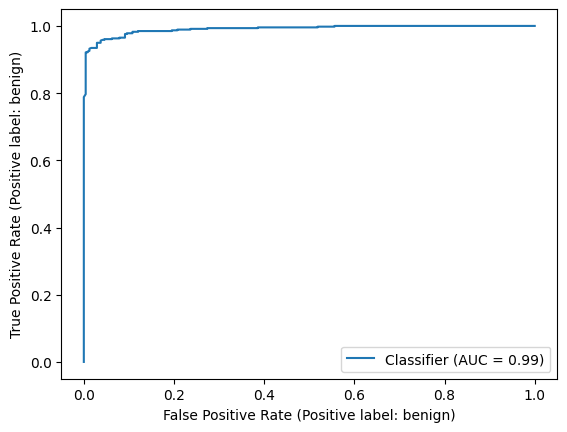

In [123]:
from sklearn.metrics import RocCurveDisplay
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt

# gegevens inlezen
biopsy = pd.read_csv('../datasets/biopsy.csv')
# LDA model fitten op slechts 1 van de 9 inputs en target
# X = biopsy[['V1']]
# Of meerdere inputs
X = biopsy[['V1', 'V2', 'V3', 'V4']]
y = biopsy['class']

lda = LinearDiscriminantAnalysis()
lda.fit(X, y)

# y_true is gewoon y
y_true = y
y_pred = lda.predict(X)
y_score = lda.predict_proba(X)[:, 0]

# Confusion Matrix
_ = ConfusionMatrixDisplay.from_predictions(y_true, y_pred)

# ROC curve plotten met eigen functie
plot_roc(y_true, y_score, pos_label='benign')

# ROC curve plotten met sci-kit learn functie
_ = RocCurveDisplay.from_predictions(y_true, y_score, pos_label='benign')

# Education voorbeeld

In [124]:
import base64


def create_onedrive_directdownload(onedrive_link):
    data_bytes64 = base64.b64encode(bytes(onedrive_link, 'utf-8'))
    data_bytes64_String = data_bytes64.decode('utf-8').replace('/', '_').replace('+', '-').rstrip("=")
    resultUrl = f"https://api.onedrive.com/v1.0/shares/u!{data_bytes64_String}/root/content"
    return resultUrl

In [125]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, roc_auc_score
from scipy.stats import norm
import matplotlib.pyplot as plt

In [126]:
education1_url = create_onedrive_directdownload(
    "https://1drv.ms/u/s!AqjRCbiILxyDgZ4wo6-ZuF97dxfyMw?e=DVP09F")  # education_roc1.csv
education2_url = create_onedrive_directdownload(
    "https://1drv.ms/u/s!AqjRCbiILxyDgZ4vzlgwo6ryg7buTQ?e=cHIjxI")  # education_roc2.csv

education = pd.read_csv(education1_url) # eerste of
# education = pd.read_csv(education2_url) # tweede dataset kiezen
education

12+ yrs   6-11yrs   y_true
0    0.337185  0.662815  6-11yrs
1    0.275267  0.724733  6-11yrs
2    0.766077  0.233923  6-11yrs
3    0.468015  0.531985  6-11yrs
4    0.808740  0.191260  6-11yrs
..        ...       ...      ...
231  0.540929  0.459071  12+ yrs
232  0.445407  0.554593  12+ yrs
233  0.374855  0.625145  12+ yrs
234  0.603396  0.396604  12+ yrs
235  0.766077  0.233923  12+ yrs

[236 rows x 3 columns]

In [127]:
education[['6-11yrs', 'y_true']].groupby('y_true').agg(['mean', 'std'])

6-11yrs          
             mean       std
y_true                     
12+ yrs  0.455264  0.146263
6-11yrs  0.558581  0.156534

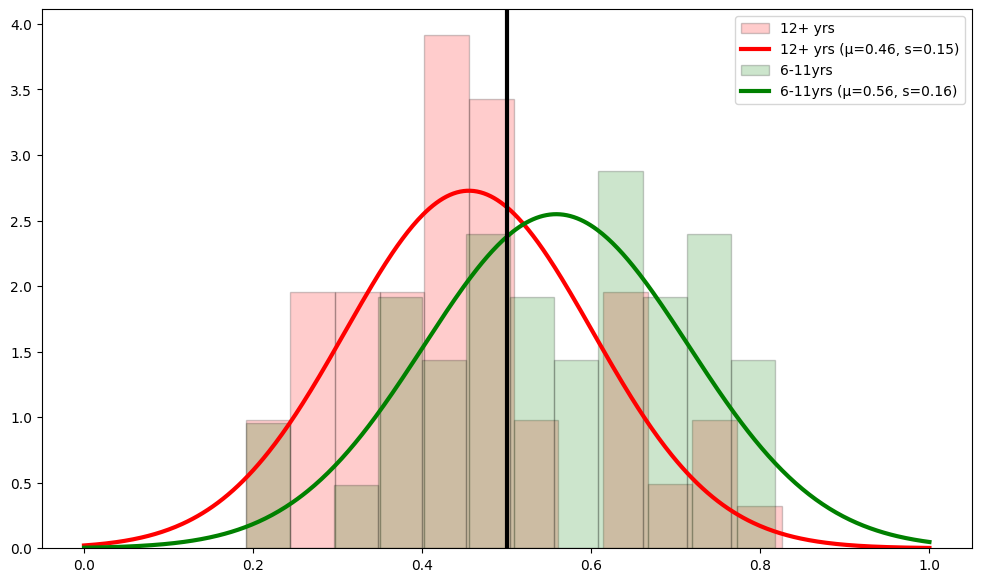

In [128]:
fig, ax = plt.subplots(figsize=(12, 7))

x = np.linspace(0, 1, 500)

threshold = 0.5

for value, color, alpha in zip(np.unique(education.y_true), ['red', 'green'], [0.2, 0.2]):
    scores = education[education.y_true == value]['6-11yrs']
    _ = ax.hist(scores, bins=12, density=True, color=color, edgecolor='black', alpha=alpha, label=value)
    # if scores.std() > 0:
    verdeling = norm(loc=scores.mean(), scale=scores.std())
    _ = ax.plot(x, verdeling.pdf(x), color=color, linewidth=3, label='{} (µ={:.2f}, s={:.2f})'.format(value, scores.mean(), scores.std()))
    _ = ax.legend()

_ = ax.axvline(x=threshold, color='black', linewidth=3)

In [129]:
fpr, tpr, threshold = roc_curve(y_true=education.y_true, y_score=education['6-11yrs'], pos_label='6-11yrs')
pd.DataFrame(zip(fpr, tpr, threshold), columns=['fpr', 'tpr', 'threshold'])

fpr    tpr  threshold
0   0.000000  0.000        inf
1   0.017241  0.000   0.825268
2   0.017241  0.100   0.759570
3   0.043103  0.100   0.756297
4   0.043103  0.150   0.749479
5   0.068966  0.150   0.742536
6   0.068966  0.200   0.724733
7   0.094828  0.200   0.717363
8   0.094828  0.300   0.662815
9   0.146552  0.300   0.646245
10  0.146552  0.350   0.633692
11  0.198276  0.400   0.625145
12  0.198276  0.450   0.616519
13  0.198276  0.525   0.585895
14  0.250000  0.525   0.554593
15  0.250000  0.550   0.550182
16  0.250000  0.600   0.531985
17  0.250000  0.625   0.509245
18  0.353448  0.675   0.490925
19  0.353448  0.725   0.477318
20  0.431034  0.750   0.459071
21  0.482759  0.750   0.445575
22  0.508621  0.775   0.436541
23  0.560345  0.775   0.414269
24  0.637931  0.825   0.405406
25  0.663793  0.825   0.396604
26  0.689655  0.875   0.375014
27  0.741379  0.900   0.366466
28  0.741379  0.925   0.353910
29  0.818966  0.925   0.345577
30  0.844828  0.925   0.325267
31  0.844828  0.950   0.309392
32  0.948276  0.950   0.282775
33  1.000000  1.000   0.191260

In [130]:
# Youden index bepaalt de locatie van de optimale threshold
pd.DataFrame(zip(fpr, tpr - fpr))

0         1
0   0.000000  0.000000
1   0.017241 -0.017241
2   0.017241  0.082759
3   0.043103  0.056897
4   0.043103  0.106897
5   0.068966  0.081034
6   0.068966  0.131034
7   0.094828  0.105172
8   0.094828  0.205172
9   0.146552  0.153448
10  0.146552  0.203448
11  0.198276  0.201724
12  0.198276  0.251724
13  0.198276  0.326724
14  0.250000  0.275000
15  0.250000  0.300000
16  0.250000  0.350000
17  0.250000  0.375000
18  0.353448  0.321552
19  0.353448  0.371552
20  0.431034  0.318966
21  0.482759  0.267241
22  0.508621  0.266379
23  0.560345  0.214655
24  0.637931  0.187069
25  0.663793  0.161207
26  0.689655  0.185345
27  0.741379  0.158621
28  0.741379  0.183621
29  0.818966  0.106034
30  0.844828  0.080172
31  0.844828  0.105172
32  0.948276  0.001724
33  1.000000  0.000000

In [131]:
roc_auc_score(y_true=education.y_true, y_score=education['6-11yrs'])

0.6924568965517243

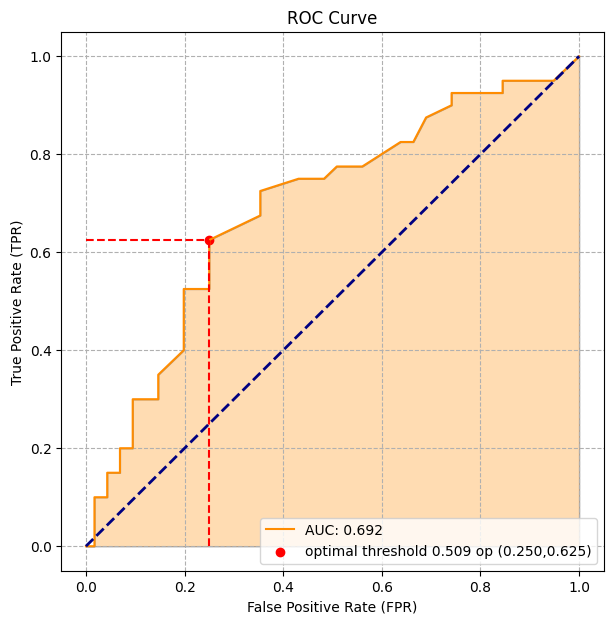

In [132]:
plot_roc(education.y_true, education['6-11yrs'], pos_label='6-11yrs')

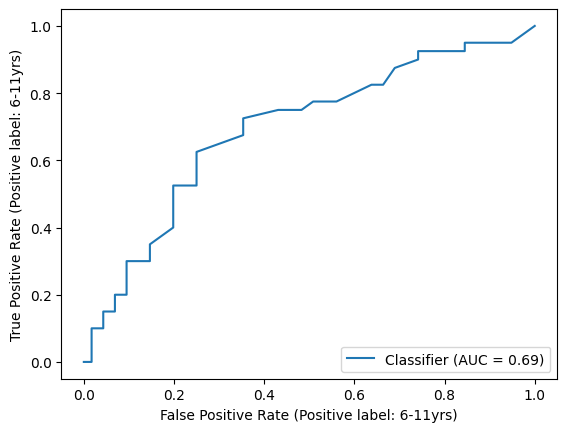

In [133]:
ax = RocCurveDisplay.from_predictions(education.y_true, education['6-11yrs'], pos_label='6-11yrs')